In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json("Sarcasm_Headlines_Dataset.json",lines=True)

In [3]:
df.sample(5)

,article_link,headline,is_sarcastic
15265,https://www.huffingtonpost.com/entry/kim-davis...,kim davis's anti-gay views are going to cost h...,0
8647,https://www.theonion.com/grandmother-will-live...,grandmother will live on in arguments over her...,1
18203,https://www.theonion.com/report-last-time-anyo...,report: last time anyone actually rose to the ...,1
16341,https://www.huffingtonpost.com/entry/fed-wells...,fed lowers the boom on wells fargo after years...,0
1710,https://entertainment.theonion.com/firefighter...,firefighters turned away from exclusive nightc...,1


In [4]:
print("Size: ",df.size)
print("Checking Null Value: ",df.isna().sum())
print("So the Data Seems to be clean of NULL VALUES!")

Size:  80127
Checking Null Value:  article_link    0
headline        0
is_sarcastic    0
dtype: int64
So the Data Seems to be clean of NULL VALUES!


In [5]:
df.drop(columns =["article_link"],inplace=True)
## We drop this column to be rid of LINK data to fetch the headline

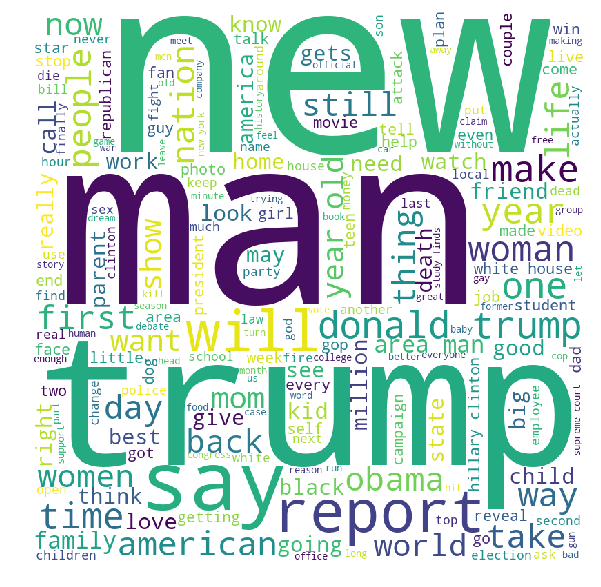

In [6]:
## Lets plot a WwORDCLOUD for the them:
words = " "
for item in df.headline:
    for inner_item in item.lower().split():
        words+=inner_item+" "
        
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [7]:
# Let's run and build the model!
from sklearn.model_selection import train_test_split
train_x,test_x,y_train,y_test = train_test_split(df.headline,df.is_sarcastic,test_size=0.1)

from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()

train_X = vect.fit_transform(train_x)

In [8]:
train_X.shape

(24038, 24107)

In [9]:
## XGB Classifier

import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
scores = []
for i in range(6,14):
    model = XGBClassifier(max_depth=i)
    model.fit(train_X,y_train)
    target = model.predict(vect.transform(test_x))
    score = accuracy_score(target,y_test)
    scores.append(accuracy_score(target,y_test))
    print("Accuracy Score: ",score, "Depth: ",i)
    
print(scores)
print("Best Score: ",max(scores))

Accuracy Score:  0.7832272557094722 Depth:  6
Accuracy Score:  0.7895919131411456 Depth:  7
Accuracy Score:  0.7940846125046799 Depth:  8
Accuracy Score:  0.7952077873455634 Depth:  9
Accuracy Score:  0.7944590041183077 Depth:  10
Accuracy Score:  0.7959565705728192 Depth:  11
Accuracy Score:  0.7974541370273306 Depth:  12
Accuracy Score:  0.798951703481842 Depth:  13
[0.7832272557094722, 0.7895919131411456, 0.7940846125046799, 0.7952077873455634, 0.7944590041183077, 0.7959565705728192, 0.7974541370273306, 0.798951703481842]
Best Score:  0.798951703481842


In [10]:
# First 5 Features

vect.get_feature_names()[:5]

['00', '000', '00000000001', '00003', '000th']

In [11]:
## So now we're cleaning the DATASET

#1. Clear of Punctuations
#2. Clearing Numbers
#3. Removing STOPWORDS
#4. Lemmatization('dog' or 'dogs' are converted to 'dog')
#5. Others, if any

import nltk
import nltk.corpus
from nltk.stem import WordNetLemmatizer


word_net_lemma = WordNetLemmatizer()
word_net_lemma.lemmatize('dogs')

'dog'

In [12]:
from nltk.corpus import stopwords
import string


stop_words = stopwords.words('english')
print('Punctuations gonna be removed: ', string.punctuation)

"""
Punctuation,
removing stop words
words with minimum length 3
lemmatizing words

"""

headlines=[]
for item in df.headline:
    word_data=" "
    for item2 in item.split():
        if item2 not in stop_words:
            word_data = word_data + word_net_lemma.lemmatize(item2.lower())+" "
    headlines.append(word_data)
    
df['refined'] = headlines
def process(text):
    nopunc = ' '.join([char for char in text if char not in string.punctuation])
    clean_words = [word for word in nopunc.split()]
    clean_words = ' '.join(clean_words)
    return clean_words

df['refined'] = df['refined'].apply(process)

Punctuations gonna be removed:  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [13]:
df.sample()

,headline,is_sarcastic,refined
21527,"report: employers created 40,000 new jobs for ...",1,r e p o r t e m p l o y e r c r e a t e d 4 0 ...


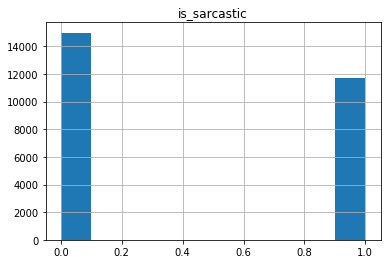

In [14]:
df.hist();

In [15]:
df.shape

(26709, 3)

In [16]:
df.describe

<bound method NDFrame.describe of                                                 headline  is_sarcastic  \
0      former versace store clerk sues over secret 'b...             0   
1      the 'roseanne' revival catches up to our thorn...             0   
2      mom starting to fear son's web series closest ...             1   
3      boehner just wants wife to listen, not come up...             1   
4      j.k. rowling wishes snape happy birthday in th...             0   
5                            advancing the world's women             0   
6         the fascinating case for eating lab-grown meat             0   
7      this ceo will send your kids to school, if you...             0   
8      top snake handler leaves sinking huckabee camp...             1   
9      friday's morning email: inside trump's presser...             0   
10     airline passengers tackle man who rushes cockp...             0   
11     facebook reportedly working on healthcare feat...             0   
12  

In [ ]:


## Word Cloud based on Sarcasm/Non-Sarcasm
wordss = " "
is_sarcasm = df[df.is_sarcastic==1].refined
for item in is_sarcasm:
    for inner_item in item.lower().split():
        wordss=wordss + inner_item + " "
        


In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800 , background_color='white',stopwords = stopwords, min_font_size=8).generate(wordss)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Sarcasm")
plt.show()

In [ ]:
words = " "
is_not_sarcasm = df[df.is_sarcastic==0].refined
for item in is_not_sarcasm:
    for inner_item in item.lower().split():
        words+=inner_item+" "
        
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("NOT Sarcasm")
plt.show()

In [ ]:
##Lets train and Build our Model!!


train_x,test_x,train_y,test_y = train_test_split(df.refined,df.is_sarcastic,test_size = 0.1)


vect = TfidfVectorizer(token_pattern = "[a-zA-Z]{2,}",max_features=2000,ngram_range=(1,2))
train_X = vect.fit_transform(train_x)


scores = []
for i in range(6,14):
    model = XGBClassifier(max_depth = i)
    model.fit(train_X,train_y)
    target = model.predict(vect.transform(test_x))
    score = accuracy_score(target,test_y)
    scores.append(score)
    print ("accuracy score: ",score," Depth: ",i)
print (scores)
print("best score: ",max(scores))

In [ ]:
vect.get_feature_names()[:5]